In [1]:
from itertools import product, combinations, compress
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.colors import LogNorm

In [2]:
hbonddata = pd.read_csv("../data/hbonddata.csv")
frag = eval(open("../data/hbondfeaturedict.txt").readline())

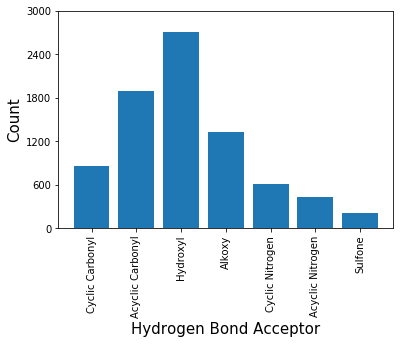

In [3]:
# Types of Receptors
# 0: Carbonyl (carbon in a ring)
# 1: Carbonyl (carbon not in a ring)
# 2: Hydroxyl
# 3: Alkoxy
# 4: Cyclic Nitrogen
# 5: Acyclic Nitrogen
# 6: Sulfone
receptors, rcount = np.unique(hbonddata.Receptor,return_counts=True)
plt.bar(receptors,rcount)
plt.ylabel("Count",fontsize=15)
plt.yticks([0,600,1200,1800,2400,3000])
plt.xticks(range(7), labels=["Cyclic Carbonyl", "Acyclic Carbonyl","Hydroxyl","Alkoxy", "Cyclic Nitrogen", "Acyclic Nitrogen", "Sulfone"], rotation=90)
plt.xlabel("Hydrogen Bond Acceptor", size=15)
plt.show()

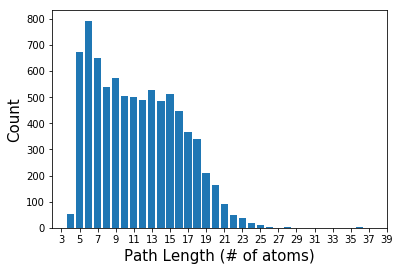

In [4]:
# Path Length
# Size of Path Features + 2 = Number of atoms from H-bond donor to H-bond acceptor
pathlength,plcount = np.unique([len(eval(path))+2 for path in hbonddata.PathFeatures],return_counts=True)
plt.bar(pathlength,plcount)
plt.xlabel("Path Length (# of atoms)",size=15)
plt.ylabel("Count",size=15)
plt.xticks(range(3,40,2))
plt.show()

In [5]:
def GetJunctionMatrix(dataframe, receptor):
    subgroup = dataframe.groupby("Receptor").get_group(receptor)
    matrix = np.zeros([len(frag),10])
    for row in subgroup.iterrows():
        pathsize = len(eval(row[1][1]))
        if pathsize<=10:
            K = pathsize/2 if pathsize%2==0 else (pathsize+1)/2
            for i,x in enumerate(eval(row[1][1])):
                if i<K:
                    r = frag.index(x)
                    c = i
                    matrix[r,c]+=1
                else:
                    r = frag.index(x)
                    c = 10-(pathsize-i)
                    matrix[r,c]+=1
    return matrix

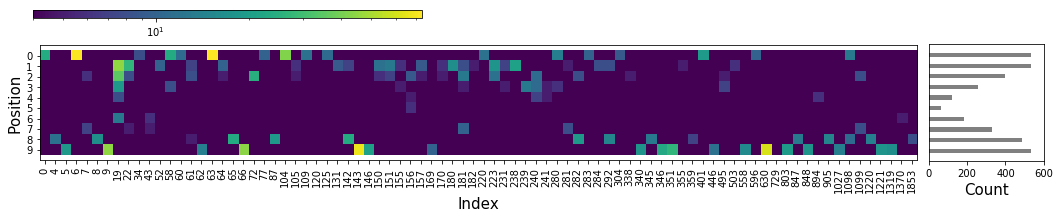

In [6]:
# Carbonyl (Carbon in a ring)
type_0_mat = GetJunctionMatrix(hbonddata,0)
# We select frequently observed features only (not showing the full matrix)
type_0_mat_submatrix = type_0_mat[type_0_mat.sum(axis=1)>=9] 

fig = plt.figure(figsize=(18,2.15))
gs = gridspec.GridSpec(nrows=1, ncols=8, wspace=0.1, hspace=0.1)
ax0_joint = fig.add_subplot(gs[0,0:7])
ax0_marg_x = fig.add_subplot(gs[0,7],sharey=ax0_joint)
hm = ax0_joint.imshow(np.transpose(type_0_mat_submatrix+1), interpolation="nearest",norm=LogNorm(vmin=4, vmax=np.max(type_0_mat_submatrix)))
cbaxes = fig.add_axes([0.12, 1.05,0.3,0.05]) 
cb = plt.colorbar(hm, cax = cbaxes,orientation="horizontal")  
ax0_joint.set_xticks(np.arange(0,type_0_mat_submatrix.shape[0]))
ax0_joint.set_xticklabels(np.where(type_0_mat.sum(axis=1)>=9)[0],fontsize=10,rotation=90)
ax0_joint.set_yticks(np.arange(10))
ax0_marg_x.get_yaxis().set_visible(False)
ax0_marg_x.barh(list(range(10)),type_0_mat.sum(axis=0),height=0.4, color="grey")
ax0_marg_x.set_xticks(np.arange(0,601,200))
ax0_marg_x.set_xlabel("Count",size=15)
ax0_joint.set_xlabel("Index", fontsize=15)
ax0_joint.set_ylabel("Position",size=15)
plt.show()

In [7]:
# frequently observed features at position 0, example 6
print(frag[6])
# 866 indicate oxygen-carbon-carbon
# 444 indicate sp3-sp3-sp3
# 000 indicate not-in-ring*3
# 000 indicate not-in-ring*3

print(frag[63])
# 866 indicate oxygen-carbon-carbon
# 444 indicate sp3-sp3-sp3
# 011 indicate not-in-ring, in ring number 1, in ring number 1.  
# 011 indicate not-in-ring, ring-membership 1, ring membership 1  

# ring number is the number of URF  that have been explored 
# URF 1 = 0,1,2,3,4,5   URF 2 = 6,7,8,9,4,5
# for example fused ring c1cccc2c1cccc2,  the path [3,4,9] 
# atoms 3 and 4 can be found in URF 1 and atom 9 is only in URF2  --> 112  

# ring-membership is the number of URFS containing the atoms of interest.
# For example fused ring c1cccc2c1cccc2.  The ring membership of fused ring atoms [atom 4,5] are 2, otherwise 1. 


866444000000
866444011011


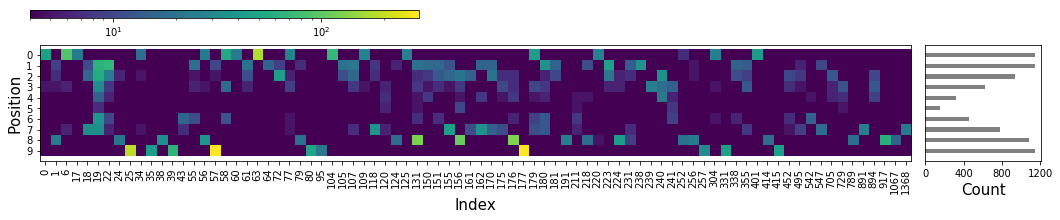

In [8]:
# Carbonyl (carbon not in a ring)
type_1_mat = GetJunctionMatrix(hbonddata,1)
# We select frequently observed features only (not showing the full matrix)
type_1_mat_submatrix = type_1_mat[type_1_mat.sum(axis=1)>=20]

fig = plt.figure(figsize=(18,2.15))
gs = gridspec.GridSpec(nrows=1, ncols=8, wspace=0.1, hspace=0.1)
ax0_joint = fig.add_subplot(gs[0,0:7])
ax0_marg_x = fig.add_subplot(gs[0,7],sharey=ax0_joint)
hm = ax0_joint.imshow(np.transpose(type_1_mat_submatrix+1), interpolation="nearest",norm=LogNorm(vmin=4, vmax=np.max(type_1_mat_submatrix)))
cbaxes = fig.add_axes([0.12, 1.05,0.3,0.05]) 
cb = plt.colorbar(hm, cax = cbaxes,orientation="horizontal")  
ax0_joint.set_xticks(np.arange(0,type_1_mat_submatrix.shape[0]))
ax0_joint.set_xticklabels(np.where(type_1_mat.sum(axis=1)>=20)[0],fontsize=10,rotation=90)
ax0_joint.set_yticks(np.arange(10))
ax0_marg_x.get_yaxis().set_visible(False)
ax0_marg_x.barh(list(range(10)),type_1_mat.sum(axis=0),height=0.4, color="grey")
ax0_marg_x.set_xticks(np.arange(0,1201,400))
ax0_marg_x.set_xlabel("Count",size=15)
ax0_joint.set_xlabel("Index", fontsize=15)
ax0_joint.set_ylabel("Position",size=15)
plt.show()

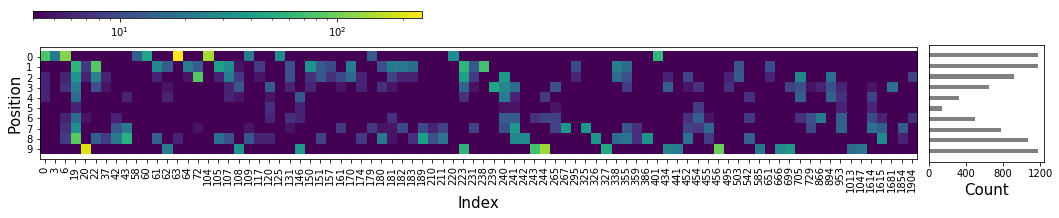

In [9]:
# Hydroxyl
type_2_mat = GetJunctionMatrix(hbonddata,2)
# We select frequently observed features only (not showing the full matrix)
type_2_mat_submatrix = type_2_mat[type_2_mat.sum(axis=1)>=19]

fig = plt.figure(figsize=(18,2.15))
gs = gridspec.GridSpec(nrows=1, ncols=8, wspace=0.1, hspace=0.1)
ax0_joint = fig.add_subplot(gs[0,0:7])
ax0_marg_x = fig.add_subplot(gs[0,7],sharey=ax0_joint)
hm = ax0_joint.imshow(np.transpose(type_2_mat_submatrix+1), interpolation="nearest",norm=LogNorm(vmin=4, vmax=np.max(type_2_mat_submatrix)))
cbaxes = fig.add_axes([0.12, 1.05,0.3,0.05]) 
cb = plt.colorbar(hm, cax = cbaxes,orientation="horizontal")  
ax0_joint.set_xticks(np.arange(0,type_2_mat_submatrix.shape[0]))
ax0_joint.set_xticklabels(np.where(type_2_mat.sum(axis=1)>=19)[0],fontsize=10,rotation=90)
ax0_joint.set_yticks(np.arange(10))
ax0_marg_x.get_yaxis().set_visible(False)
ax0_marg_x.barh(list(range(10)),type_2_mat.sum(axis=0),height=0.4, color="grey")
ax0_marg_x.set_xticks(np.arange(0,1201,400))
ax0_marg_x.set_xlabel("Count",size=15)
ax0_joint.set_xlabel("Index", fontsize=15)
ax0_joint.set_ylabel("Position",size=15)
plt.show()

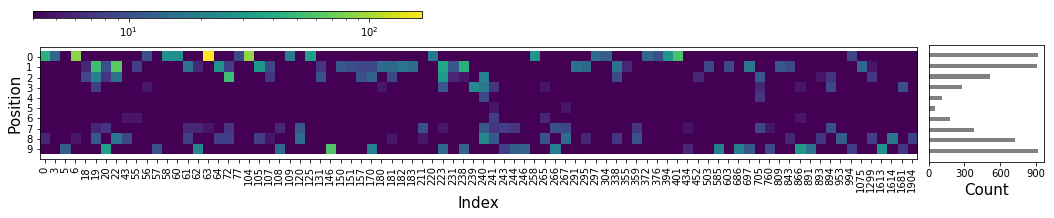

In [10]:
# Alkoxy
type_3_mat = GetJunctionMatrix(hbonddata,3)
# We select frequently observed features only instead showing the full matrix
type_3_mat_submatrix = type_3_mat[type_3_mat.sum(axis=1)>=13]

fig = plt.figure(figsize=(18,2.15))
gs = gridspec.GridSpec(nrows=1, ncols=8, wspace=0.1, hspace=0.1)
ax0_joint = fig.add_subplot(gs[0,0:7])
ax0_marg_x = fig.add_subplot(gs[0,7],sharey=ax0_joint)
hm = ax0_joint.imshow(np.transpose(type_3_mat_submatrix+1), interpolation="nearest",norm=LogNorm(vmin=4, vmax=np.max(type_3_mat_submatrix)))
cbaxes = fig.add_axes([0.12, 1.05,0.3,0.05]) 
cb = plt.colorbar(hm, cax = cbaxes,orientation="horizontal")  
ax0_joint.set_xticks(np.arange(0,type_3_mat_submatrix.shape[0]))
ax0_joint.set_xticklabels(np.where(type_3_mat.sum(axis=1)>=13)[0],fontsize=10,rotation=90)
ax0_joint.set_yticks(np.arange(10))
ax0_marg_x.get_yaxis().set_visible(False)
ax0_marg_x.barh(list(range(10)),type_3_mat.sum(axis=0),height=0.4, color="grey")
ax0_marg_x.set_xticks(np.arange(0,1001,300))
ax0_marg_x.set_xlabel("Count",size=15)
ax0_joint.set_xlabel("Index", fontsize=15)
ax0_joint.set_ylabel("Position",size=15)
plt.show()

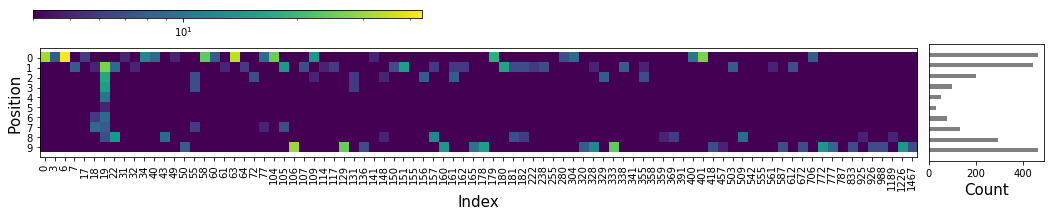

In [11]:
# Cyclic Nitrogen
type_4_mat = GetJunctionMatrix(hbonddata,4)
# We select frequently observed features only (not showing the full matrix)
type_4_mat_submatrix = type_4_mat[type_4_mat.sum(axis=1)>=6]

fig = plt.figure(figsize=(18,2.15))
gs = gridspec.GridSpec(nrows=1, ncols=8, wspace=0.1, hspace=0.1)
ax0_joint = fig.add_subplot(gs[0,0:7])
ax0_marg_x = fig.add_subplot(gs[0,7],sharey=ax0_joint)
hm = ax0_joint.imshow(np.transpose(type_4_mat_submatrix+1), interpolation="nearest",norm=LogNorm(vmin=4, vmax=np.max(type_4_mat_submatrix)))
cbaxes = fig.add_axes([0.12, 1.05,0.3,0.05]) 
cb = plt.colorbar(hm, cax = cbaxes,orientation="horizontal")  
ax0_joint.set_xticks(np.arange(0,type_4_mat_submatrix.shape[0]))
ax0_joint.set_xticklabels(np.where(type_4_mat.sum(axis=1)>=6)[0],fontsize=10,rotation=90)
ax0_joint.set_yticks(np.arange(10))
ax0_marg_x.get_yaxis().set_visible(False)
ax0_marg_x.barh(list(range(10)),type_4_mat.sum(axis=0),height=0.4, color="grey")
ax0_marg_x.set_xticks(np.arange(0,501,200))
ax0_marg_x.set_xlabel("Count",size=15)
ax0_joint.set_xlabel("Index", fontsize=15)
ax0_joint.set_ylabel("Position",size=15)
plt.show()

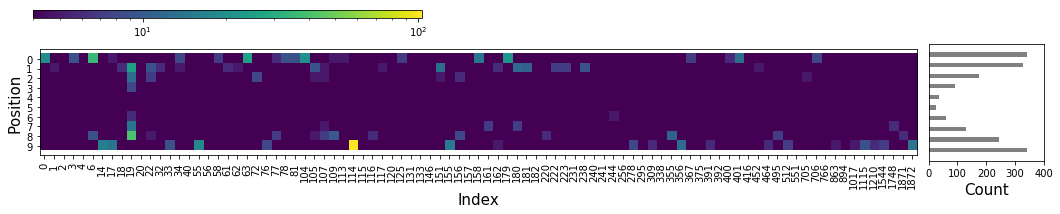

In [12]:
# Cyclic Nitrogen
type_5_mat = GetJunctionMatrix(hbonddata,5)
# We select frequently observed features only (not showing the full matrix)
type_5_mat_submatrix = type_5_mat[type_5_mat.sum(axis=1)>=5]
fig = plt.figure(figsize=(18,2.15))
gs = gridspec.GridSpec(nrows=1, ncols=8, wspace=0.1, hspace=0.1)
ax0_joint = fig.add_subplot(gs[0,0:7])
ax0_marg_x = fig.add_subplot(gs[0,7],sharey=ax0_joint)
hm = ax0_joint.imshow(np.transpose(type_5_mat_submatrix+1), interpolation="nearest",norm=LogNorm(vmin=4, vmax=np.max(type_5_mat_submatrix)))
cbaxes = fig.add_axes([0.12, 1.05,0.3,0.05]) 
cb = plt.colorbar(hm, cax = cbaxes,orientation="horizontal")  
ax0_joint.set_xticks(np.arange(0,type_5_mat_submatrix.shape[0]))
ax0_joint.set_xticklabels(np.where(type_5_mat.sum(axis=1)>=5)[0],fontsize=10,rotation=90)
ax0_joint.set_yticks(np.arange(10))
ax0_marg_x.get_yaxis().set_visible(False)
ax0_marg_x.barh(list(range(10)),type_5_mat.sum(axis=0),height=0.4, color="grey")
ax0_marg_x.set_xticks(np.arange(0,401,100))
ax0_marg_x.set_xlabel("Count",size=15)
ax0_joint.set_xlabel("Index", fontsize=15)
ax0_joint.set_ylabel("Position",size=15)
plt.show()